In [69]:
import keras
from keras.datasets import mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train.shape

(60000, 28, 28)

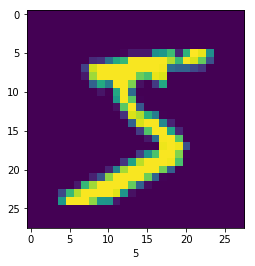

In [57]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0])
plt.xlabel(y_train[0])
plt.show()

In [58]:
x_train.shape

x_reshaped_train = (x_train/255).reshape(60000, 784)
x_reshaped_test = (x_test/255).reshape(10000, 784)

In [59]:
from keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


In [60]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
model = Sequential()
model.add(Dense(10, activation='sigmoid', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


In [61]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics = ['accuracy'])
model.fit(x_reshaped_train, y_train, batch_size=100, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 1s 18us/step - loss: 2.1527 - acc: 0.3430
Epoch 2/5
60000/60000 [==============================] - 1s 15us/step - loss: 1.8615 - acc: 0.5868
Epoch 3/5
60000/60000 [==============================] - 1s 14us/step - loss: 1.6328 - acc: 0.6350
Epoch 4/5
60000/60000 [==============================] - 1s 14us/step - loss: 1.4487 - acc: 0.6769
Epoch 5/5
60000/60000 [==============================] - 1s 13us/step - loss: 1.3017 - acc: 0.7154


In [62]:
test_loss, test_acc = model.evaluate(x_reshaped_test, y_test)
print(test_acc)

10000/10000 [==============================] - 0s 19us/step
0.7496


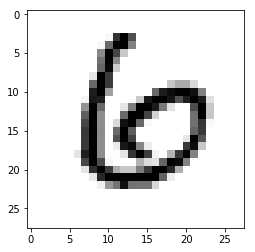

In [64]:
plt.imshow(x_test[11], cmap=plt.cm.binary)
plt.show()

In [71]:

predictions = model.predict(x_reshaped_test)

print(predictions[11])

[0.12810001 0.08630873 0.13970804 0.08925612 0.10327733 0.07530034
 0.1758041  0.03445723 0.10920759 0.05858039]


In [72]:
np.argmax(predictions[11])

6

In [73]:
np.sum(predictions[11])

0.9999998